In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
from time import time
import seaborn as sns


import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [2]:
gg = pd.read_excel('Google & Yelp Reviews.xlsx',sheetname=0)
df = gg[~gg['Review'].isnull()]
df.shape

(1551, 4)

In [3]:
yy = pd.read_excel('Google & Yelp Reviews.xlsx',sheetname=1)
df2 = yy[~yy['Review'].isnull()]
df2.shape

(372, 4)

In [4]:
df = df.append(df2)
df.shape

(1923, 4)

In [5]:
df = df[(df['Rating']<4)]
df.shape

(278, 4)

In [6]:
import nltk
# nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer
import string

from nltk.corpus import stopwords 
stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation) 
lemmatize = WordNetLemmatizer()



In [7]:
stop = pd.read_fwf('stop.txt',names=['words'])
stopwords.update(set(stop['words'].values))
# print (list(stopwords)[:10])
stopwords.update(set(['dont','lot','wa','im','ha','doe','wa', 'able',]))

In [8]:
def cleaning(article):
    article = str(article)
    zero = "".join(i for i in article if i not in punctuation)
    
    one = " ".join([i for i in zero.lower().split() if i not in stopwords])
    
    three = " ".join(lemmatize.lemmatize(i) for i in one.split())
    return three

In [9]:
from collections import defaultdict
freq = defaultdict(int)

for i in stopwords:
    freq[i]+=1

In [10]:
print type(freq)
freq['it']

1

### all

In [11]:
# all_content = df['content'].append(holdout['content'])

In [12]:
all_content=df['Review']
apple = all_content

### choices

In [13]:
# nltk.download('wordnet')
start = time()

ap_text = apple.apply(cleaning)
ap_text_list = [i.split() for i in ap_text]
print (len(ap_text_list))

print ('used: {:.2f}s'.format(time()-start))

In [14]:
ap_text[:10]

4     tried charge 500 replace sump pump battery rep...
9     ive heard masterdry little positive neighbor a...
15    guy crook contacted estimate crawl space fairl...
28    installed french drain sump pump half basement...
32    impression called gsm issue central air tech h...
36    waiting 2 month basement water coming door loo...
52    recently sump pump exit drain installed wood c...
60    creak foundation deal asian senior inspector c...
85    itg stand guy unprofessional job begin salesma...
91    hired rod martin install egress window noted s...
Name: Review, dtype: object

In [15]:
from gensim.models.phrases import Phraser, Phrases

start = time()
phs = Phrases(ap_text_list)
('used: {:.2f}s'.format(time()-start))

'used: 0.02s'

In [16]:
bi_gram = Phraser(phs)
start = time()

new_bi_list = [bi_gram[i] for i in ap_text_list]

('used: {:.2f}s'.format(time()-start))

'used: 0.04s'

In [17]:
bi_gram[ap_text_list[0]]

[u'tried',
 u'charge',
 u'500',
 u'replace',
 u'sump_pump',
 u'battery',
 u'replaced',
 u'exact',
 u'battery',
 u'100',
 u'10',
 u'minute',
 u'disappointing',
 u'ripoff']

In [18]:
new_bi_list[0]

[u'tried',
 u'charge',
 u'500',
 u'replace',
 u'sump_pump',
 u'battery',
 u'replaced',
 u'exact',
 u'battery',
 u'100',
 u'10',
 u'minute',
 u'disappointing',
 u'ripoff']

In [19]:
start = time()

phs3=Phrases(new_bi_list)
tri_gram=Phraser(phs3)

('used: {:.2f}s'.format(time()-start))


'used: 0.12s'

In [20]:
start = time()

new_tri_list = [tri_gram[i] for i in new_bi_list]

('used: {:.2f}s'.format(time()-start))


'used: 0.04s'

In [21]:
# new_tri_list = new_bi_list

In [22]:
make_dic = dict()
for i,j in zip(range(len(new_tri_list)), new_tri_list):
    make_dic[i]=j

In [23]:
without_stop = pd.Series(make_dic)

In [24]:
without_stop.head(10)

0    [tried, charge, 500, replace, sump_pump, batte...
1    [ive, heard, masterdry, little, positive, neig...
2    [guy, crook, contacted, estimate, crawl_space,...
3    [installed, french, drain, sump_pump, half, ba...
4    [impression, called, gsm, issue, central, air,...
5    [waiting, 2, month, basement, water, coming, d...
6    [recently, sump_pump, exit, drain, installed, ...
7    [creak, foundation, deal, asian, senior, inspe...
8    [itg, stand, guy, unprofessional, job, begin, ...
9    [hired, rod, martin, install, egress, window, ...
dtype: object

In [25]:
len(without_stop[0])

14

In [26]:
def helper_len(x):
    leng=[0]
    for i in x:
        leng.append(len(i))
    return max(leng)

In [27]:
with_stop = without_stop.apply(helper_len)

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
with_stop.value_counts().head(10)

12    46
10    46
11    45
13    29
16    26
8     18
9     17
14    16
15    13
17     6
dtype: int64

<Container object of 15 artists>

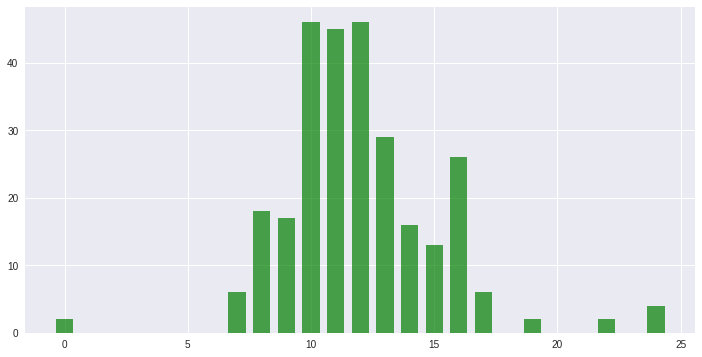

In [29]:
graph = with_stop.value_counts()

plt.figure(figsize=(12,6))
plt.bar(graph.index, graph.values, .7, color='g', alpha=.7)

In [30]:
without_stop[:10]

0    [tried, charge, 500, replace, sump_pump, batte...
1    [ive, heard, masterdry, little, positive, neig...
2    [guy, crook, contacted, estimate, crawl_space,...
3    [installed, french, drain, sump_pump, half, ba...
4    [impression, called, gsm, issue, central, air,...
5    [waiting, 2, month, basement, water, coming, d...
6    [recently, sump_pump, exit, drain, installed, ...
7    [creak, foundation, deal, asian, senior, inspe...
8    [itg, stand, guy, unprofessional, job, begin, ...
9    [hired, rod, martin, install, egress, window, ...
dtype: object

In [31]:
ap_text_list = list(without_stop.values)

In [32]:
len(ap_text_list)

278

In [33]:
ap_text_list[0]

[u'tried',
 u'charge',
 u'500',
 u'replace',
 u'sump_pump',
 u'battery',
 u'replaced',
 u'exact',
 u'battery',
 u'100',
 u'10',
 u'minute',
 u'disappointing',
 u'ripoff']

## topic models

In [34]:
# ! pip install gensim pyLDAvis WordCloud

### change name

In [35]:
# Importing Gensim
import gensim
from gensim import corpora

from time import time
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO,
                   filename='re_b.log',filemode='w')

In [36]:
# Creating the term dictionary of our courpus,
# where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(ap_text_list)
dictionary.save('re_b.dict')
(dictionary)

In [62]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in ap_text_list]
corpora.MmCorpus.serialize('re_b.mm', doc_term_matrix)
(len(doc_term_matrix))
(doc_term_matrix)
pd.options.display.max_columns=25
pd.DataFrame(doc_term_matrix)

0         1          2          3          4          5    \
0      (0, 1)    (1, 1)     (2, 2)     (3, 1)     (4, 1)     (5, 1)   
1     (13, 3)   (14, 1)    (15, 1)    (16, 1)    (17, 1)    (18, 1)   
2      (5, 1)   (14, 1)    (15, 1)    (24, 1)    (27, 1)    (60, 1)   
3      (8, 1)   (14, 1)    (18, 1)    (46, 2)   (106, 1)   (107, 1)   
4     (14, 1)   (34, 2)    (54, 1)    (82, 2)    (84, 1)   (102, 1)   
5      (8, 2)   (33, 1)    (61, 1)    (76, 1)   (124, 1)   (127, 2)   
6      (8, 1)  (109, 2)   (113, 2)   (123, 1)   (126, 3)   (135, 1)   
7     (52, 1)  (133, 1)   (134, 1)   (135, 1)   (167, 1)   (231, 1)   
8      (8, 1)   (14, 1)    (16, 1)    (25, 1)    (44, 4)    (46, 1)   
9     (42, 1)   (43, 1)    (76, 1)    (91, 1)   (100, 1)   (118, 1)   
10   (127, 1)  (136, 1)   (153, 1)   (165, 2)   (167, 1)   (359, 1)   
11    (29, 1)   (51, 1)    (70, 1)    (76, 3)    (84, 1)    (87, 3)   
12    (93, 1)  (286, 1)   (401, 1)   (402, 1)   (403, 1)   (404, 1)   
13    (17, 1)   (64, 1)   (408, 1)   (409, 1)   (410, 1)   (411, 1)   
14     (1, 2)   (17, 1)    (25, 1)    (29, 1)    (32, 1)    (37, 1)   
15    (14, 1)   (49, 1)    (50, 1)   (167, 2)   (480, 1)       None   
16   (397, 1)  (481, 1)       None       None       None       None   
17     (0, 1)   (12, 1)    (33, 1)    (61, 1)   (103, 1)   (117, 1)   
18    (76, 1)  (144, 1)   (157, 1)   (167, 1)   (270, 1)   (498, 1)   
19    (82, 1)  (102, 1)   (118, 1)   (127, 1)   (133, 1)   (135, 1)   
20    (53, 1)   (62, 1)    (76, 3)    (99, 1)   (103, 2)   (129, 1)   
21    (13, 1)   (21, 1)    (24, 1)    (29, 2)    (40, 1)    (56, 1)   
22    (40, 2)  (206, 1)   (378, 1)   (594, 1)   (617, 1)   (625, 1)   
23     (2, 1)    (3, 1)   (100, 1)   (155, 1)   (485, 1)   (650, 1)   
24     (3, 1)   (33, 1)    (34, 1)    (50, 1)    (56, 1)    (81, 1)   
25   (671, 1)  (672, 1)   (673, 1)       None       None       None   
26    (28, 1)   (33, 1)    (37, 1)    (38, 1)    (40, 1)    (50, 1)   
27    (13, 1)   (50, 1)    (82, 1)   (135, 1)   (167, 1)   (189, 1)   
28    (14, 1)   (17, 1)    (32, 1)    (42, 1)    (52, 1)    (56, 1)   
29     (8, 1)   (17, 1)    (19, 1)    (26, 1)    (35, 1)    (52, 1)   
..        ...       ...        ...        ...        ...        ...   
248  (109, 3)  (277, 1)   (284, 1)   (303, 1)   (622, 1)   (729, 1)   
249   (25, 1)   (86, 1)    (88, 1)    (92, 1)   (127, 1)   (153, 1)   
250    (5, 1)  (259, 1)   (270, 1)   (564, 2)   (966, 1)  (1201, 1)   
251   (40, 1)   (51, 1)  (2160, 1)  (2597, 1)  (2840, 1)  (2989, 1)   
252    (8, 1)  (109, 1)   (155, 1)   (234, 1)   (241, 1)   (311, 1)   
253  (532, 1)  (869, 1)   (901, 1)  (1204, 1)  (1219, 1)  (1623, 1)   
254  (167, 2)  (231, 1)   (370, 1)   (495, 1)   (532, 1)  (3003, 1)   
255  (145, 1)  (160, 1)   (167, 1)   (257, 1)   (361, 1)   (496, 1)   
256  (125, 1)  (129, 1)   (167, 1)   (201, 1)   (340, 1)   (472, 1)   
257   (33, 1)  (167, 1)   (320, 1)   (361, 1)   (465, 1)   (507, 1)   
258  (102, 2)  (164, 2)   (201, 1)   (231, 1)   (439, 1)   (444, 1)   
259    (8, 1)  (127, 1)   (185, 1)   (343, 1)   (455, 1)  (1084, 1)   
260   (72, 1)  (102, 1)   (127, 1)   (153, 1)   (164, 2)   (167, 2)   
261  (122, 1)  (127, 1)   (160, 1)   (273, 1)   (458, 1)   (490, 1)   
262    (0, 1)   (17, 1)    (87, 1)   (167, 1)   (266, 1)   (315, 1)   
263   (40, 1)  (109, 1)   (155, 1)   (167, 1)   (400, 1)   (406, 1)   
264  (127, 1)  (165, 1)   (243, 1)   (354, 1)   (454, 1)   (485, 2)   
265   (26, 1)   (39, 1)   (121, 1)   (167, 1)   (249, 1)   (564, 2)   
266  (164, 1)  (167, 1)   (347, 1)   (428, 1)   (454, 1)   (707, 1)   
267    (5, 1)   (17, 1)    (40, 1)   (125, 1)   (132, 1)   (133, 1)   
268  (121, 1)  (167, 1)   (564, 1)   (703, 2)   (811, 1)  (1189, 1)   
269   (17, 1)  (145, 1)   (153, 1)   (175, 1)   (242, 1)   (362, 1)   
270  (127, 1)  (129, 1)   (167, 1)   (213, 1)   (228, 1)   (347, 1)   
271   (31, 1)   (37, 1)    (55, 1)   (250, 1)   (329, 1)   (903, 1)   
272   (17, 1)   (84, 1)    (87, 1)

In [39]:
# Lda?

In [63]:
start = time()
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, 
#                passes=5
              )
# 'used: {:.2f}s'.format(time()-start)

In [64]:
ldamodel.print_topics()

[(0,
  u'0.011*"company" + 0.008*"basement" + 0.007*"call" + 0.006*"day" + 0.006*"window" + 0.006*"told" + 0.006*"time" + 0.005*"house" + 0.005*"service" + 0.004*"home"'),
 (1,
  u'0.018*"company" + 0.011*"basement" + 0.008*"call" + 0.007*"house" + 0.006*"wall" + 0.006*"job" + 0.006*"day" + 0.005*"time" + 0.005*"home" + 0.004*"issue"'),
 (2,
  u'0.011*"time" + 0.009*"company" + 0.008*"day" + 0.008*"basement" + 0.007*"told" + 0.006*"job" + 0.006*"service" + 0.006*"home" + 0.006*"appointment" + 0.006*"system"'),
 (3,
  u'0.010*"company" + 0.007*"job" + 0.007*"time" + 0.007*"called" + 0.006*"fix" + 0.006*"basement" + 0.006*"service" + 0.006*"day" + 0.006*"told" + 0.005*"house"'),
 (4,
  u'0.012*"company" + 0.012*"basement" + 0.010*"time" + 0.010*"call" + 0.008*"home" + 0.007*"system" + 0.007*"house" + 0.007*"called" + 0.007*"job" + 0.006*"week"')]

In [42]:
# !pip install pyLDAvis

In [43]:
ldamodel.save('re_b.model')

## load saved model

In [44]:
from gensim.models import LdaModel
loading = LdaModel.load('re_b.model')

## plotting



In [45]:
import pyLDAvis.gensim
import gensim
from time import time
pyLDAvis.enable_notebook()

In [46]:
d = gensim.corpora.Dictionary.load('re_b.dict')
c = gensim.corpora.MmCorpus('re_b.mm')
lda = gensim.models.LdaModel.load('re_b.model')

In [47]:
start = time()

data = pyLDAvis.gensim.prepare(lda, c, d)

print ('used: {:.2f}s'.format(time()-start))

In [48]:
pyLDAvis.save_html(data,'re_b.html')

In [49]:
data

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      26.516189        1       1 -0.020259  0.036299
1      20.259694        1       2 -0.031850  0.003220
0      18.020434        1       3 -0.008480 -0.019304
2      17.626569        1       4  0.005877 -0.036454
4      17.577114        1       5  0.054712  0.016239, topic_info=     Category        Freq          Term       Total  loglift  logprob
term                                                                 
1628  Default  127.000000       company  127.000000  30.0000  30.0000
372   Default   22.000000            de   22.000000  29.0000  29.0000
709   Default    9.000000          mold    9.000000  28.0000  28.0000
953   Default   18.000000   crawl_space   18.000000  27.0000  27.0000
181   Default   40.000000           fix   40.000000  26.0000  26.0000
2428  Default   11.000000       furnace   11.000000  25.0000  25.0000
94    Default   76.000000          call   76.000000  24.0000  24.0000
368   Default   15.000000             ��   15.000000  23.0000  23.0000
1492  Default   12.000000            la   12.000000  22.0000  22.0000
830   Default   26.000000         water   26.000000  21.0000  21.0000
1021  Default   11.000000            et   11.000000  20.0000  20.0000
2405  Default   11.000000          pour   11.000000  19.0000  19.0000
52    Default   59.000000          told   59.000000  18.0000  18.0000
2463  Default   15.000000            le   15.000000  17.0000  17.0000
2230  Default   55.000000        called   55.000000  16.0000  16.0000
602   Default   30.000000        people   30.000000  15.0000  15.0000
2486  Default   63.000000           day   63.000000  14.0000  14.0000
343   Default   11.000000          tech   11.000000  13.0000  13.0000
440   Default    9.000000           une    9.000000  12.0000  12.0000
2936  Default    8.000000       promise    8.000000  11.0000  11.0000
107   Default   17.000000         phone   17.000000  10.0000  10.0000
1722  Default    8.000000       stephen    8.000000   9.0000   9.0000
750   Default   87.000000          time   87.000000   8.0000   8.0000
1662  Default    8.000000         pompe    8.000000   7.0000   7.0000
555   Default   36.000000          left   36.000000   6.0000   6.0000
2036  Default    5.000000           gas    5.000000   5.0000   5.0000
278   Default   43.000000       service   43.000000   4.0000   4.0000
2663  Default   12.000000      employee   12.000000   3.0000   3.0000
1071  Default   10.000000      engineer   10.000000   2.0000   2.0000
1598  Default   29.000000    experience   29.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
2019   Topic5    2.595946            pa    5.409214   1.0044  -6.5829
1963   Topic5    2.541370        expert    5.286661   1.0061  -6.6042
877    Topic5    1.937194          vous    3.821429   1.0592  -6.8757
1071   Topic5    4.540312      engineer   10.749727   0.8767  -6.0239
956    Topic5    2.223230            si    4.602421   1.0110  -6.7379
2900   Topic5    2.197956           est    4.585498   1.0032  -6.7494
157    Topic5    1.575001         third    3.052738   1.0768  -7.0826
2311   Topic5    4.996533           try   13.164590   0.7698  -5.9282
2189   Topic5    7.424128        repair   25.605432   0.5005  -5.5322
1488   Topic5    3.146242       offered    7.695485   0.8441  -6.3907
2453   Topic5   17.441428      basement   97.560812   0.0169  -4.6781
714    Topic5    6.040902         floor   21.771642   0.4565  -5.7383
1628   Topic5   18.994593       company  127.041926  -0.1618  -4.5927
140    Topic5    6.486667     sump_pump   24.354721   0.4156  -5.6672
2237   Topic5   11.027412          home   57.353568   0.0897  -5.1365
181    Topic5    8.845623           fix   40.717738   0.2118  -5.3570
2729   Topic5   11.404231           job   65.100105  -0.0034  -5.1029
94     Topic5   12.357889          call   76.788841  -0.0882  -5.0226
555    T

## wordcloud

In [50]:
ap_text_list

[[u'tried',
  u'charge',
  u'500',
  u'replace',
  u'sump_pump',
  u'battery',
  u'replaced',
  u'exact',
  u'battery',
  u'100',
  u'10',
  u'minute',
  u'disappointing',
  u'ripoff'],
 [u'ive',
  u'heard',
  u'masterdry',
  u'little',
  u'positive',
  u'neighbor',
  u'associate',
  u'mine',
  u'house',
  u'terrible',
  u'experience',
  u'ive',
  u'heard',
  u'management',
  u'poor',
  u'8th',
  u'grader',
  u'run',
  u'business',
  u'efficiently',
  u'worker',
  u'ive',
  u'heard',
  u'seen',
  u'suppose',
  u'run',
  u'try',
  u'solve',
  u'calling',
  u'office',
  u'solid',
  u'answer',
  u'figure',
  u'heard',
  u'negative',
  u'worker',
  u'little',
  u'started',
  u'salesman',
  u'mean',
  u'salesman',
  u'try',
  u'sell',
  u'extra',
  u'dollar',
  u'line',
  u'pocket',
  u'recommend',
  u'masterdry',
  u'looking',
  u'professional',
  u'business',
  u'hard',
  u'worker',
  u'yes',
  u'wanna',
  u'lose',
  u'money',
  u'advise',
  u'staying'],
 [u'guy',
  u'crook',
  u'contacte